[CIFAR-10 Dataset](https://www.cs.toronto.edu/~kriz/cifar.html) was built and shared by Alex Krizhevsky, Vinod Nair, and Geoffrey Hinton.

### Load tensorflow

In [1]:
import numpy as np

In [2]:
import tensorflow as tf

### Collect Data

In [3]:
(trainX, trainY),(testX, testY) = tf.keras.datasets.cifar10.load_data()

In [4]:
trainX.shape

(50000, 32, 32, 3)

### Convert Output label to multiple values

In [5]:
trainY = tf.keras.utils.to_categorical(trainY, num_classes=10)
testY = tf.keras.utils.to_categorical(testY, num_classes=10)

In [6]:
trainX=trainX/255
testX=testX/255    # standardize the data for train and test to be between 0-1

## Build the Graph

In [7]:
tf.keras.backend.clear_session()
#Initialize model, reshape & normalize data
model = tf.keras.models.Sequential()

#Reshape data from 2D (28,28) to 3D (28, 28, 1)
model.add(tf.keras.layers.Reshape((32,32,3),input_shape=(32,32,3)))

### Apply Convolutional Layers, MaxPooling

In [8]:
#Add first convolutional layer
model.add(tf.keras.layers.Conv2D(32, #Number of filters 
                                 kernel_size=(3,3), #Size of the filter
                                 activation='relu'))

#Add second convolutional layer
model.add(tf.keras.layers.Conv2D(64, kernel_size=(3,3), activation='relu'))
model.add(tf.keras.layers.MaxPool2D(pool_size=(2,2)))
model.add(tf.keras.layers.Conv2D(128, kernel_size=(3,3), activation='relu'))
model.add(tf.keras.layers.Conv2D(256, kernel_size=(3,3), activation='relu'))
#Add MaxPooling layer
model.add(tf.keras.layers.MaxPool2D(pool_size=(2,2)))

#model.add(tf.keras.layers.GlobalAveragePooling2D())

### Add layers for Classification

In [9]:
#Flatten the output
model.add(tf.keras.layers.Flatten())

#Dense layer
model.add(tf.keras.layers.Dense(128, activation='relu'))

#Add another dropout layer
model.add(tf.keras.layers.Dropout(0.3))

#Output layer
model.add(tf.keras.layers.Dense(10, activation='softmax'))

In [10]:
model.compile(optimizer='adam', 
              loss='categorical_crossentropy', metrics=['accuracy'])

In [11]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 reshape (Reshape)           (None, 32, 32, 3)         0         
                                                                 
 conv2d (Conv2D)             (None, 30, 30, 32)        896       
                                                                 
 conv2d_1 (Conv2D)           (None, 28, 28, 64)        18496     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 64)       0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 12, 12, 128)       73856     
                                                                 
 conv2d_3 (Conv2D)           (None, 10, 10, 256)       295168    
                                                        

## Train the model

In [12]:
#Train the model
model.fit(trainX,trainY,          
          validation_data=(testX,testY),
          epochs=10,
          batch_size=32)

Epoch 1/10
1563/1563 [==============================] - 147s 94ms/step - loss: 1.5028 - accuracy: 0.4574 - val_loss: 1.1006 - val_accuracy: 0.6100
Epoch 2/10
1563/1563 [==============================] - 140s 89ms/step - loss: 1.0305 - accuracy: 0.6366 - val_loss: 0.9321 - val_accuracy: 0.6749
Epoch 3/10
1563/1563 [==============================] - 143s 92ms/step - loss: 0.8443 - accuracy: 0.7051 - val_loss: 0.7951 - val_accuracy: 0.7306
Epoch 4/10
1563/1563 [==============================] - 146s 93ms/step - loss: 0.7238 - accuracy: 0.7469 - val_loss: 0.7604 - val_accuracy: 0.7363
Epoch 5/10
1563/1563 [==============================] - 137s 87ms/step - loss: 0.6318 - accuracy: 0.7786 - val_loss: 0.7483 - val_accuracy: 0.7506
Epoch 6/10
1563/1563 [==============================] - 136s 87ms/step - loss: 0.5495 - accuracy: 0.8059 - val_loss: 0.7480 - val_accuracy: 0.7526
Epoch 7/10
1563/1563 [==============================] - 420s 269ms/step - loss: 0.4842 - accuracy: 0.8296 - val_loss: 

In [13]:
model.save('demo.h5')

In [14]:
!ls -l

'ls' is not recognized as an internal or external command,
operable program or batch file.


In [15]:
tf.keras.backend.clear_session()
#Initialize model, reshape & normalize data
model = tf.keras.models.Sequential()
model = tf.keras.applications.vgg19.VGG19(include_top=False, #Do not include FC layer at the end
                                          input_shape=(32,32, 3),
                                          weights='imagenet')

80134624/80134624 [==============================] - 14s 0us/step


In [16]:
#Set pre-trained model layers to not trainable
for layer in model.layers:
    layer.trainable = False

In [17]:
print(len(model.layers))
for layer in model.layers[10:]:
    layer.trainable =  True   

22


### Add FC layer for new classes

In [18]:
#get Output layer of Pretrained model
x = model.output

#Flatten the output to feed to Dense layer
x = tf.keras.layers.Flatten()(x)

#Add one Dense layer
x = tf.keras.layers.Dense(200, activation='relu')(x)

#Add output layer
prediction = tf.keras.layers.Dense(10,activation='softmax')(x)

In [19]:
model.summary()

Model: "vgg19"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 32, 32, 3)]       0         
                                                                 
 block1_conv1 (Conv2D)       (None, 32, 32, 64)        1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 32, 32, 64)        36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 16, 16, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 16, 16, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 16, 16, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 8, 8, 128)         0     

### Building final model for Classification

In [20]:
#Using Keras Model class
final_model = tf.keras.models.Model(inputs=model.input, #Pre-trained model input as input layer
                                    outputs=prediction) #Output layer added

In [21]:
final_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [22]:
final_model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 32, 32, 3)]       0         
                                                                 
 block1_conv1 (Conv2D)       (None, 32, 32, 64)        1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 32, 32, 64)        36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 16, 16, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 16, 16, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 16, 16, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 8, 8, 128)         0     

### Train the model

In [23]:
final_model.fit(trainX,trainY,          
          validation_data=(testX,testY),
          epochs=10,
          batch_size=64)


Epoch 1/10
782/782 [==============================] - 1502s 2s/step - loss: 1.7810 - accuracy: 0.3035 - val_loss: 1.7917 - val_accuracy: 0.2991
Epoch 2/10
782/782 [==============================] - 1390s 2s/step - loss: 1.3622 - accuracy: 0.4957 - val_loss: 1.1745 - val_accuracy: 0.5852
Epoch 3/10
782/782 [==============================] - 1504s 2s/step - loss: 1.1658 - accuracy: 0.5902 - val_loss: 1.0791 - val_accuracy: 0.6319
Epoch 4/10
782/782 [==============================] - 1531s 2s/step - loss: 1.0394 - accuracy: 0.6418 - val_loss: 1.0623 - val_accuracy: 0.6477
Epoch 5/10
782/782 [==============================] - 1501s 2s/step - loss: 0.9358 - accuracy: 0.6815 - val_loss: 0.9509 - val_accuracy: 0.6787
Epoch 6/10
782/782 [==============================] - 1446s 2s/step - loss: 0.8508 - accuracy: 0.7103 - val_loss: 0.8884 - val_accuracy: 0.7118
Epoch 7/10
782/782 [==============================] - 1454s 2s/step - loss: 0.7941 - accuracy: 0.7314 - val_loss: 0.8508 - val_accuracy:

In [24]:
import numpy as np
from keras.datasets import cifar10

#Load the dataset:
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

In [25]:
print("There are {} train images and {} test images.".format(X_train.shape[0], X_test.shape[0]))
print('There are {} unique classes to predict.'.format(np.unique(y_train).shape[0]))

There are 50000 train images and 10000 test images.
There are 10 unique classes to predict.


In [26]:
#One-hot encoding the labels
num_classes = 10
from keras.utils import np_utils
y_train = np_utils.to_categorical(y_train, num_classes)
y_test = np_utils.to_categorical(y_test, num_classes)

Shape of each image in the training data:  (32, 32, 3)


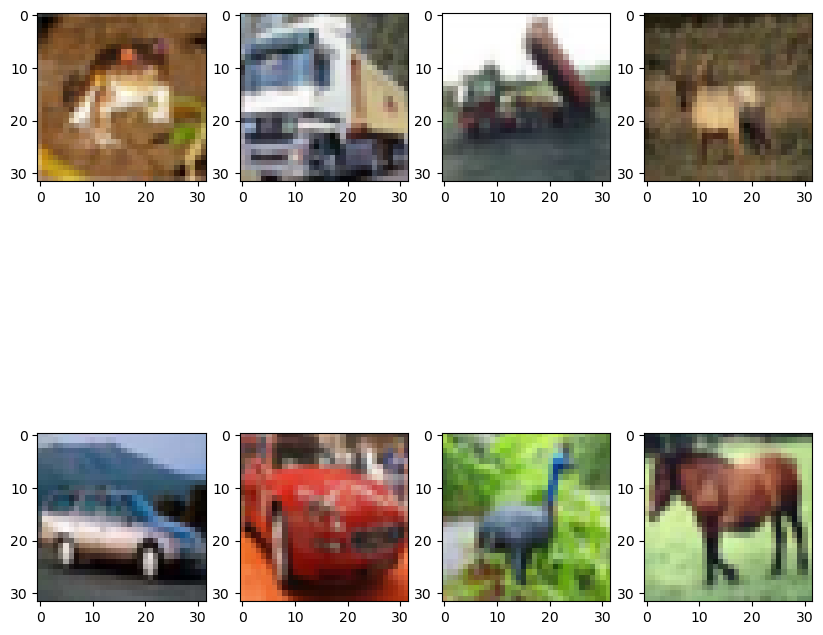

In [27]:
%matplotlib inline

import matplotlib.pyplot as plt

fig = plt.figure(figsize=(10, 10))

for i in range(1, 9):
    img = X_train[i-1]
    fig.add_subplot(2, 4, i)
    plt.imshow(img)

print('Shape of each image in the training data: ', X_train.shape[1:])

In [28]:
#Importing the necessary libraries 
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPooling2D
from keras.layers import Dropout, Flatten, GlobalAveragePooling2D

#Building up a Sequential model
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu',input_shape = X_train.shape[1:]))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(32, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(GlobalAveragePooling2D())
model.add(Dense(10, activation='softmax'))
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 15, 15, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 13, 13, 32)        9248      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 6, 6, 32)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 4, 4, 64)          18496     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 2, 2, 64)        

In [29]:
model.compile(loss='binary_crossentropy', optimizer='adam',
              metrics=['accuracy'])

In [30]:
X_train_scratch = X_train/255
X_test_scratch = X_test/255

In [31]:
from keras.callbacks import ModelCheckpoint

checkpointer = ModelCheckpoint(filepath='scratchmodel.best.hdf5', 
                               verbose=1,save_best_only=True)

In [32]:
#Fitting the model on the train data and labels.
model.fit(X_train, y_train, batch_size=32, epochs=10, 
          verbose=1, callbacks=[checkpointer], validation_split=0.2, shuffle=True)

Epoch 1/10
1248/1250 [============================>.] - ETA: 0s - loss: 0.3065 - accuracy: 0.3177
Epoch 1: val_loss improved from inf to 0.25287, saving model to scratchmodel.best.hdf5
1250/1250 [==============================] - 24s 18ms/step - loss: 0.3064 - accuracy: 0.3178 - val_loss: 0.2529 - val_accuracy: 0.4028
Epoch 2/10
1250/1250 [==============================] - ETA: 0s - loss: 0.2415 - accuracy: 0.4464
Epoch 2: val_loss improved from 0.25287 to 0.24886, saving model to scratchmodel.best.hdf5
1250/1250 [==============================] - 23s 18ms/step - loss: 0.2415 - accuracy: 0.4464 - val_loss: 0.2489 - val_accuracy: 0.4330
Epoch 3/10
1247/1250 [============================>.] - ETA: 0s - loss: 0.2214 - accuracy: 0.5097
Epoch 3: val_loss improved from 0.24886 to 0.22282, saving model to scratchmodel.best.hdf5
1250/1250 [==============================] - 21s 17ms/step - loss: 0.2213 - accuracy: 0.5099 - val_loss: 0.2228 - val_accuracy: 0.5029
Epoch 4/10
1250/1250 [==========

In [33]:
#Evaluate the model on the test data
score = model.evaluate(X_test, y_test)

#Accuracy on test data
print('Accuracy on the Test Images: ', score[1])

313/313 [==============================] - 2s 6ms/step - loss: 0.1766 - accuracy: 0.6412
Accuracy on the Test Images:  0.6412000060081482


## Vanilla CNN + Data Augmentation

In [34]:
from keras.preprocessing.image import ImageDataGenerator

# This will do preprocessing and realtime data augmentation:
datagen = ImageDataGenerator(
    featurewise_center=False,  # set input mean to 0 over the dataset
    samplewise_center=False,  # set each sample mean to 0
    featurewise_std_normalization=False,  # divide inputs by std of the dataset
    samplewise_std_normalization=False,  # divide each input by its std
    zca_whitening=False,  # apply ZCA whitening
    rotation_range=50,  # randomly rotate images in the range (degrees, 0 to 180)
    width_shift_range=0.1,  # randomly shift images horizontally (fraction of total width)
    height_shift_range=0.1,  # randomly shift images vertically (fraction of total height)
    horizontal_flip=False,  # randomly flip images
    vertical_flip=False)  # randomly flip images

# Prepare the generator
datagen.fit(trainX)

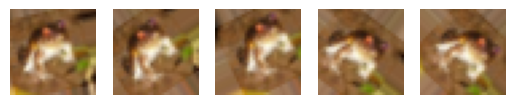

In [35]:
from matplotlib import pyplot as plt
gen = datagen.flow(trainX[:1], batch_size=1)
for i in range(1, 6):
    plt.subplot(1,5,i)
    plt.axis("off")
    plt.imshow(gen.next().squeeze(), cmap='gray')
    plt.plot()

## Build the Graph

In [36]:
tf.keras.backend.clear_session()
#Initialize model, reshape & normalize data
model = tf.keras.models.Sequential()

#Reshape data from 2D (28,28) to 3D (28, 28, 1)
model.add(tf.keras.layers.Reshape((32,32,3),input_shape=(32,32,3)))

### Apply Convolutional Layers, MaxPooling

In [37]:
#Add first convolutional layer
model.add(tf.keras.layers.Conv2D(32, #Number of filters 
                                 kernel_size=(3,3), #Size of the filter
                                 activation='relu'))

#Add second convolutional layer
model.add(tf.keras.layers.Conv2D(64, kernel_size=(3,3), activation='relu'))
model.add(tf.keras.layers.MaxPool2D(pool_size=(2,2)))
model.add(tf.keras.layers.Conv2D(128, kernel_size=(3,3), activation='relu'))
model.add(tf.keras.layers.Conv2D(256, kernel_size=(3,3), activation='relu'))
#Add MaxPooling layer
model.add(tf.keras.layers.MaxPool2D(pool_size=(2,2)))

#model.add(tf.keras.layers.GlobalAveragePooling2D())

### Add layers for Classification

In [38]:
#Flatten the output
model.add(tf.keras.layers.Flatten())

#Dense layer
model.add(tf.keras.layers.Dense(128, activation='relu'))

#Add another dropout layer
model.add(tf.keras.layers.Dropout(0.3))

#Output layer
model.add(tf.keras.layers.Dense(10, activation='softmax'))

In [39]:
model.compile(optimizer='adam', 
              loss='categorical_crossentropy', metrics=['accuracy'])

In [40]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 reshape (Reshape)           (None, 32, 32, 3)         0         
                                                                 
 conv2d (Conv2D)             (None, 30, 30, 32)        896       
                                                                 
 conv2d_1 (Conv2D)           (None, 28, 28, 64)        18496     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 64)       0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 12, 12, 128)       73856     
                                                                 
 conv2d_3 (Conv2D)           (None, 10, 10, 256)       295168    
                                                        

In [41]:
TRAIN = True
BATCH_SIZE = 32
EPOCHS = 10

In [42]:
TRAIN= True
if TRAIN:
    model.fit_generator(datagen.flow(trainX, trainY,
                        batch_size=BATCH_SIZE),
                        steps_per_epoch=trainX.shape[0]/BATCH_SIZE,
                        epochs=EPOCHS,
                        validation_data=(testX, testY))
    model.save('./cnn_augment.h5')
else:
    print('Loading pretrained model...')
    model3 = keras.models.load_model('./cnn_augment.h5')
    print('Model Loaded.')

Epoch 1/10


C:\Users\19144\AppData\Local\Temp\ipykernel_9172\3266446990.py:3: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  model.fit_generator(datagen.flow(trainX, trainY,


1562/1562 [==============================] - 148s 94ms/step - loss: 1.8244 - accuracy: 0.3254 - val_loss: 1.4118 - val_accuracy: 0.4771
Epoch 2/10
1562/1562 [==============================] - 146s 94ms/step - loss: 1.5045 - accuracy: 0.4548 - val_loss: 1.2472 - val_accuracy: 0.5446
Epoch 3/10
1562/1562 [==============================] - 150s 96ms/step - loss: 1.3507 - accuracy: 0.5156 - val_loss: 1.1454 - val_accuracy: 0.5983
Epoch 4/10
1562/1562 [==============================] - 143s 92ms/step - loss: 1.2597 - accuracy: 0.5548 - val_loss: 1.0522 - val_accuracy: 0.6280
Epoch 5/10
1562/1562 [==============================] - 151s 96ms/step - loss: 1.1813 - accuracy: 0.5877 - val_loss: 1.1079 - val_accuracy: 0.6106
Epoch 6/10
1562/1562 [==============================] - 150s 96ms/step - loss: 1.1346 - accuracy: 0.6030 - val_loss: 0.9677 - val_accuracy: 0.6659
Epoch 7/10
1562/1562 [==============================] - 147s 94ms/step - loss: 1.0820 - accuracy: 0.6240 - val_loss: 0.9297 - val

In [58]:
import keras
import keras.utils
from keras import utils as np_utils
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation
from keras.optimizers import SGD
model3 = keras.models.load_model('./cnn_augment.h5')
loss_and_metrics = model3.evaluate(testX, testY)
print(loss_and_metrics)

313/313 [==============================] - 8s 24ms/step - loss: 0.9096 - accuracy: 0.6892
[0.9096300601959229, 0.6891999840736389]
